In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

11.18891455147245 84.56353379888338
-66.08945513628 -99.32134148707749
-74.85583407240682 -173.12235738539795
50.601752126019335 177.67514059079537
-12.840664872666466 -104.17546135000926
-47.86190475085611 -94.02122204283644
-38.15228336353616 61.86252247185712
18.13515925314985 -70.64474558515879
48.70620508258466 -179.61123364471007
-12.184433575410637 -110.10372094540874
77.21944507992427 -138.00962616636235
73.06442472773614 -139.01851435483286
-10.52529221471083 -5.447990914708953
-80.90085796616096 -72.96659109872849
66.66323237838441 -134.79325348678688
23.77544872425196 -141.47332641248263
-26.339334370064947 -49.94034053253233
-2.299870260426701 -75.08307205539833
-47.942215620601026 -127.80642445722248
82.34734675401208 74.85391868939658
32.61456030353722 -160.95809051256472
-70.1772780474631 139.46849278957234
-2.8407355333729356 63.96768564505848
-46.12963685289836 -71.59353894171565
32.23214516666819 -107.24335916899024
-55.763650599072726 27.725239950542857
-21.910417235

In [14]:
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

608

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec4355085bfa38109e62b68879759cc


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | azua
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | mafra
Processing Record 16 of Set 1 | puerto leguizamo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | coihaique
Processing 

Processing Record 34 of Set 4 | kavieng
Processing Record 35 of Set 4 | holme
Processing Record 36 of Set 4 | labuan
Processing Record 37 of Set 4 | dunedin
Processing Record 38 of Set 4 | asau
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | mapiri
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | dzaoudzi
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | bobon
Processing Record 47 of Set 4 | leh
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | chake chake
Processing Record 1 of Set 5 | plouzane
Processing Record 2 of Set 5 | sur
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | ayan
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | san quintin
Processi

Processing Record 26 of Set 8 | goundam
Processing Record 27 of Set 8 | ust-nera
Processing Record 28 of Set 8 | narsaq
Processing Record 29 of Set 8 | muroto
Processing Record 30 of Set 8 | varhaug
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | ponta do sol
Processing Record 33 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 8 | anadyr
Processing Record 35 of Set 8 | utica
Processing Record 36 of Set 8 | bizhbulyak
Processing Record 37 of Set 8 | fenoarivo
Processing Record 38 of Set 8 | gobabis
Processing Record 39 of Set 8 | ust-ishim
Processing Record 40 of Set 8 | marawi
Processing Record 41 of Set 8 | sao desiderio
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | komsomolskiy
Processing Record 44 of Set 8 | kontagora
Processing Record 45 of Set 8 | sumbawanga
Processing Record 46 of Set 8 | kapoeta
Processing Record 47 of Set 8 | bahia honda
Processing Record 48 of Set 8 | asmara
Processing Record 49 o

Processing Record 16 of Set 12 | zaysan
Processing Record 17 of Set 12 | esmeraldas
Processing Record 18 of Set 12 | giyon
Processing Record 19 of Set 12 | sayyan
Processing Record 20 of Set 12 | chimbote
Processing Record 21 of Set 12 | labutta
City not found. Skipping...
Processing Record 22 of Set 12 | shatrovo
Processing Record 23 of Set 12 | adeje
Processing Record 24 of Set 12 | leshukonskoye
Processing Record 25 of Set 12 | blytheville
Processing Record 26 of Set 12 | surskoye
Processing Record 27 of Set 12 | budhlada
Processing Record 28 of Set 12 | dumai
Processing Record 29 of Set 12 | magelang
Processing Record 30 of Set 12 | lesnoy
Processing Record 31 of Set 12 | hunza
City not found. Skipping...
Processing Record 32 of Set 12 | ingham
Processing Record 33 of Set 12 | springbok
Processing Record 34 of Set 12 | turan
Processing Record 35 of Set 12 | arraial do cabo
Processing Record 36 of Set 12 | faro
Processing Record 37 of Set 12 | monrovia
Processing Record 38 of Set 12

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.91,82,75,12.66,CL,2022-11-15 01:20:28
1,Vaini,-21.2000,-175.2000,80.76,78,40,6.91,TO,2022-11-15 01:20:28
2,Nikolskoye,59.7035,30.7861,33.80,97,100,6.85,RU,2022-11-15 01:20:28
3,Puerto Ayora,-0.7393,-90.3518,70.56,84,86,5.01,EC,2022-11-15 01:20:29
4,Castro,-24.7911,-50.0119,63.07,94,92,5.75,BR,2022-11-15 01:20:29
5,Saint-Philippe,-21.3585,55.7679,69.39,63,39,12.88,RE,2022-11-15 01:20:29
6,Azua,18.4532,-70.7349,76.06,87,1,5.19,DO,2022-11-15 01:20:30
7,Provideniya,64.3833,-173.3000,30.36,55,100,13.42,RU,2022-11-15 01:20:30
8,Tuktoyaktuk,69.4541,-133.0374,14.00,92,100,20.71,CA,2022-11-15 01:20:30
9,Aklavik,68.2191,-135.0107,16.27,91,100,21.23,CA,2022-11-15 01:20:31


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-11-15 01:20:28,-53.1500,-70.9167,51.91,82,75,12.66
1,Vaini,TO,2022-11-15 01:20:28,-21.2000,-175.2000,80.76,78,40,6.91
2,Nikolskoye,RU,2022-11-15 01:20:28,59.7035,30.7861,33.80,97,100,6.85
3,Puerto Ayora,EC,2022-11-15 01:20:29,-0.7393,-90.3518,70.56,84,86,5.01
4,Castro,BR,2022-11-15 01:20:29,-24.7911,-50.0119,63.07,94,92,5.75
5,Saint-Philippe,RE,2022-11-15 01:20:29,-21.3585,55.7679,69.39,63,39,12.88
6,Azua,DO,2022-11-15 01:20:30,18.4532,-70.7349,76.06,87,1,5.19
7,Provideniya,RU,2022-11-15 01:20:30,64.3833,-173.3000,30.36,55,100,13.42
8,Tuktoyaktuk,CA,2022-11-15 01:20:30,69.4541,-133.0374,14.00,92,100,20.71
9,Aklavik,CA,2022-11-15 01:20:31,68.2191,-135.0107,16.27,91,100,21.23


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1668476172.5246844

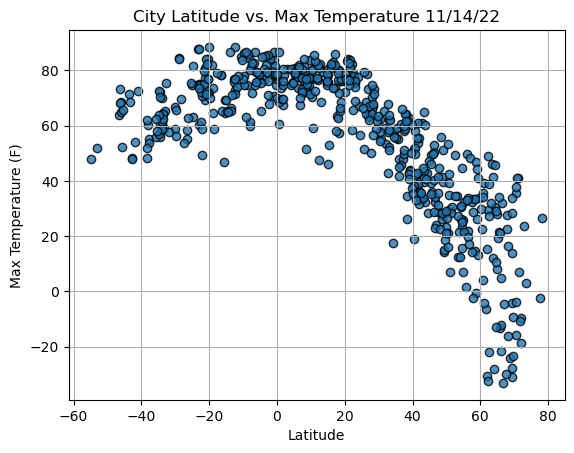

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

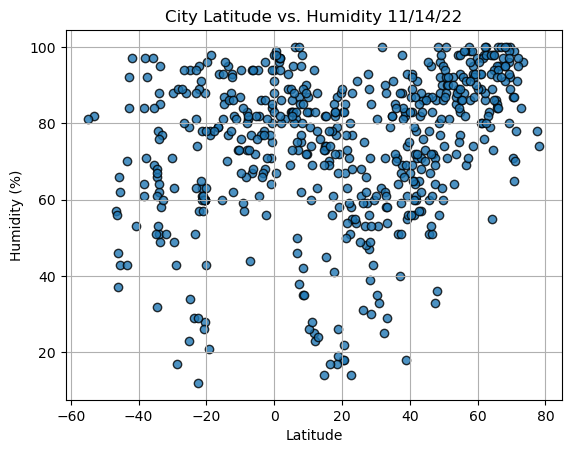

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

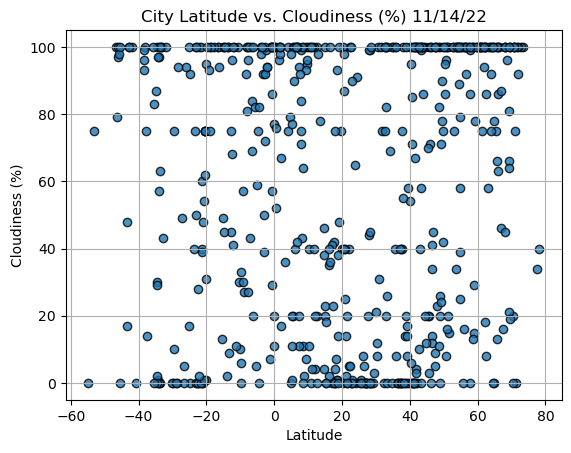

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

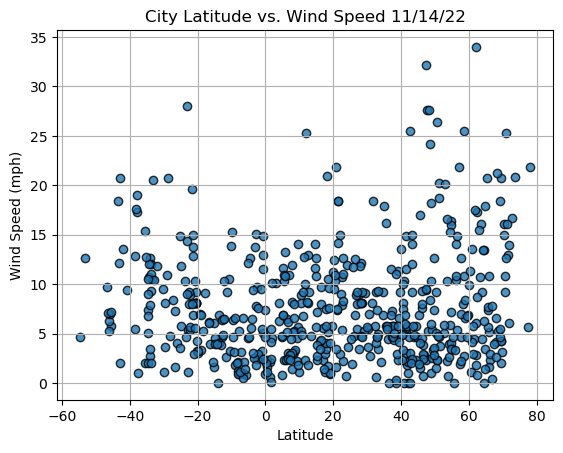

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line/the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nikolskoye,RU,2022-11-15 01:20:28,59.7035,30.7861,33.80,97,100,6.85
6,Azua,DO,2022-11-15 01:20:30,18.4532,-70.7349,76.06,87,1,5.19
7,Provideniya,RU,2022-11-15 01:20:30,64.3833,-173.3000,30.36,55,100,13.42
8,Tuktoyaktuk,CA,2022-11-15 01:20:30,69.4541,-133.0374,14.00,92,100,20.71
9,Aklavik,CA,2022-11-15 01:20:31,68.2191,-135.0107,16.27,91,100,21.23


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

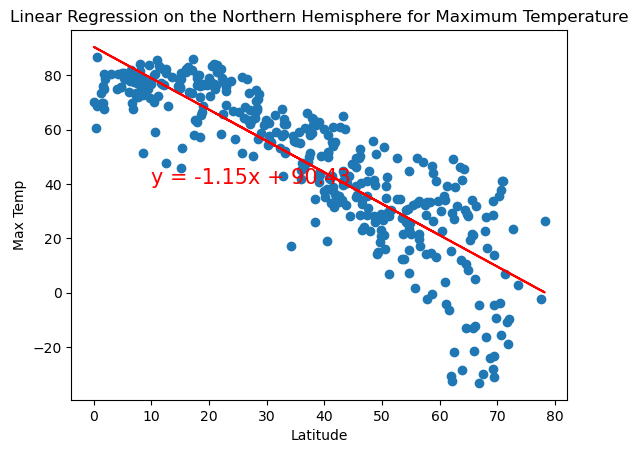

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

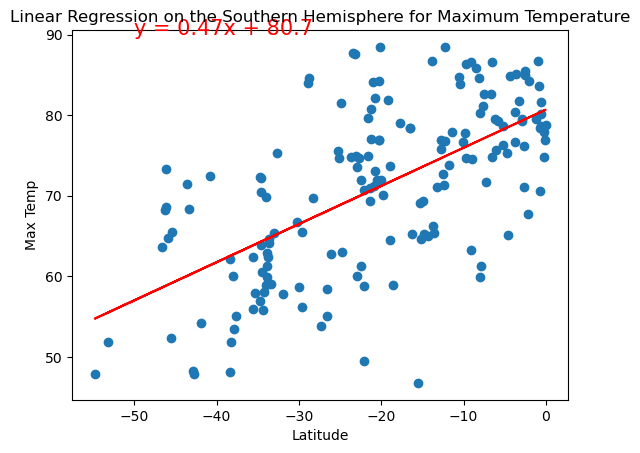

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

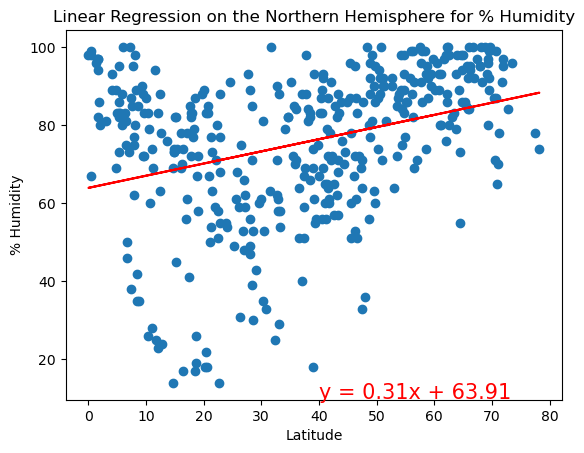

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

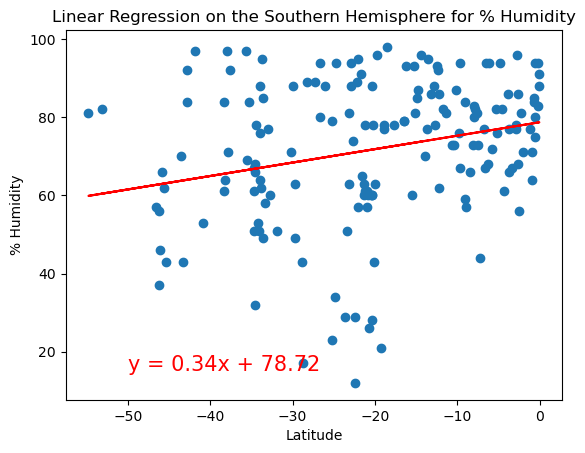

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

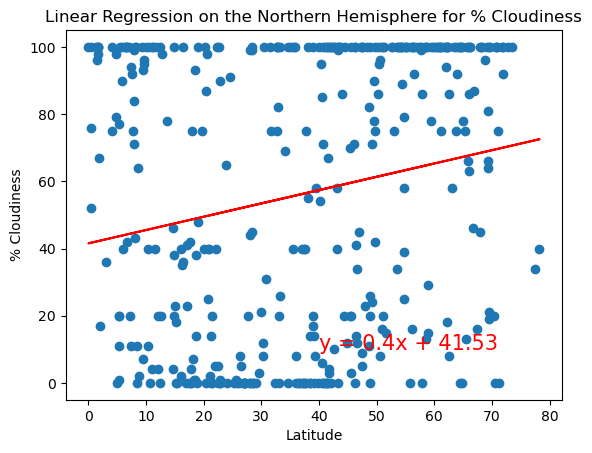

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

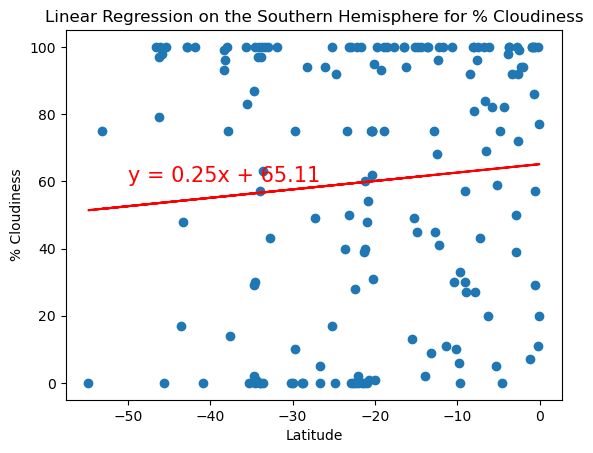

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

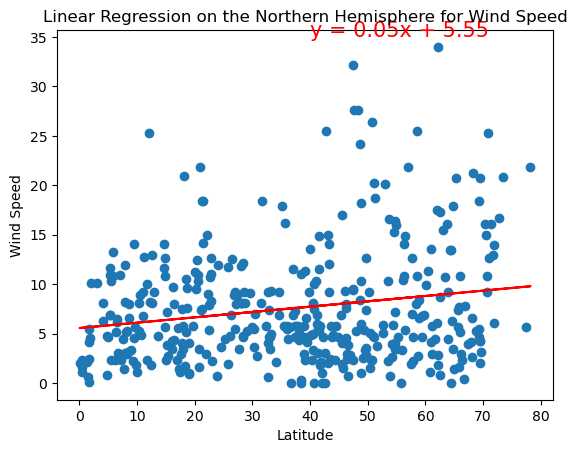

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

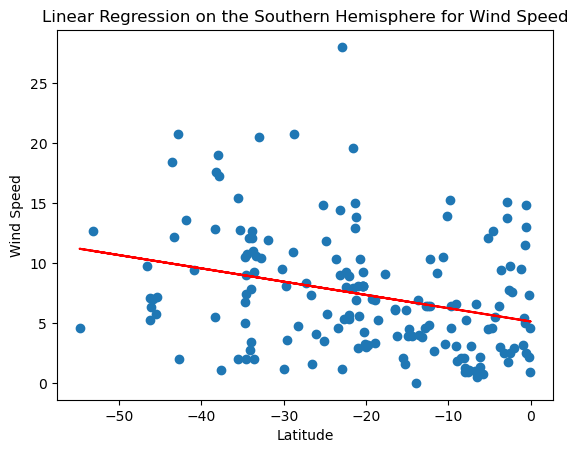

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))